In [1]:
from dataset import PronscorDataset
import pandas as pd
from IPython.display import Audio

In [93]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cd ../..

/home/priera/s3prl/s3prl


In [97]:
data_root =  '/mnt/raid1/jazmin/data/l2arctic/'
data_root = '/media/secondary/Datasets/l2arctic_release_v5.0/'
# data_root =  '/media/secondary/Datasets/TIMIT/data'
phone_path= './downstream/pronscor/data'
alignment_file= 'converted_aligned_phones.txt'
# alignment_file= 'converted_aligned_phones_TIMIT.txt'
bucket_file= './downstream/pronscor/data/len_for_bucket_arctic' # run: `python preprocess/generate_len_for_bucket.py -i your_path_to/TIMIT -a .WAV -n len_for_bucket_timit`
# bucket_file= './downstream/pronscor/data/len_for_bucket_timit' # run: `python preprocess/generate_len_for_bucket.py -i your_path_to/TIMIT -a .WAV -n len_for_bucket_timit`
train_split_file= 'train_split.txt'
test_split_file= 'test_split.txt'
# test_split_file= 'test_split_TIMIT.txt'

In [98]:
test_dataset = PronscorDataset('dev', 64, data_root, phone_path, alignment_file, train_split_file, test_split_file, bucket_file)

[Dataset] - # phone classes: 40, number of data for dev: 891


In [99]:
# test_dataset.Y['ABA_a0003']

In [100]:
batch = test_dataset[0]
wav = batch[0][0]
lab = batch[1][0]
print(test_dataset.X[0][0])

TEST16k/MBMPS_a0298.WAV


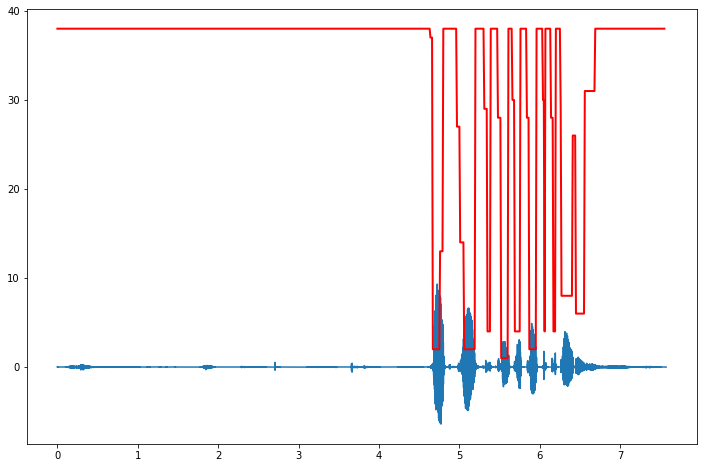

In [94]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(len(wav))/16000, wav*30)
plt.plot(np.arange(len(lab))*0.01,lab, 'r', lw=2)

In [95]:
Audio(wav,rate=16000)

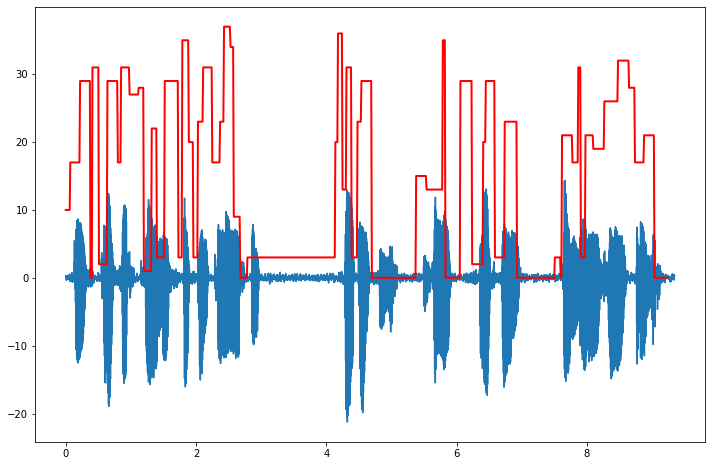

In [102]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(len(wav))/16000, wav*30)
plt.plot(np.arange(len(lab))*0.01,lab, 'r', lw=2)
# plt.xlim(4,5)

In [31]:
Audio(wav,rate=16000)

In [51]:
Audio('/media/secondary/Datasets/l2arctic_release_v5.0/TEST16k/MBMPS_a0298.WAV')

In [12]:
# from pathlib import Path

In [103]:
with open('/home/priera/s3prl/s3prl/downstream/pronscor/data/train_split.txt','r') as fp:
    for n in fp.readlines():
        spk, utt = n.strip().split('_')
        spk = spk.upper()
        fi = '/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/'+n.strip()+'.WAV'
        if not Path(fi).exists():
            print(fi)
            Path(fi).symlink_to(f'/media/secondary/Datasets/l2arctic_release_v5.0/16k/{spk}/wav/arctic_{utt}.wav')

/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/ABA_a0003.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/ABA_a0005.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/ABA_a0006.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/ABA_a0007.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/ABA_a0008.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/ABA_a0010.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/ABA_a0011.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/ABA_a0013.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/ABA_a0018.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/ABA_a0019.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/ABA_a0020.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/ABA_a0021.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/ABA_a0022.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/ABA_a0023.WAV
/media

/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/YBAA_b0340.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/YBAA_b0348.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/YBAA_b0367.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/YBAA_b0413.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/YBAA_b0424.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/YBAA_b0425.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/YBAA_b0428.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/YBAA_b0432.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/YBAA_b0433.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/YBAA_b0434.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/YBAA_b0438.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/YBAA_b0444.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/YBAA_b0452.WAV
/media/secondary/Datasets/l2arctic_release_v5.0/TRAIN16k/YBAA_b0

In [36]:
files = list(Path('/media/secondary/Datasets/l2arctic_release_v5.0').rglob('*.wav'))

In [42]:
df = pd.DataFrame(list(map(lambda x: x.parts, files)))

In [55]:
# df[df[5].isin(['HQTV', 'TLV', 'TXHC', 'YKWK', 'PNV',
#        'HKK', 'ZHAA', 'BWC', 'MBMPS', 'SVBI', 'EBVS', 'RRBI', 'SKA',
#        'YBAA', 'THV', 'HJK', 'NCC', 'ERMS', 'TNI', 'LXC', 'ABA', 'YDCK',
#        'NJS', 'ASI'])]

In [59]:
# sorted(['HQTV', 'TLV', 'TXHC', 'YKWK', 'PNV',
#        'HKK', 'ZHAA', 'BWC', 'MBMPS', 'SVBI', 'EBVS', 'RRBI', 'SKA',
#        'YBAA', 'THV', 'HJK', 'NCC', 'ERMS', 'TNI', 'LXC', 'ABA', 'YDCK',
#        'NJS', 'ASI'])

In [58]:
# sorted(['ABA','EBVS','HJK','HQTV','LXC','NCC','PNV','SKA','THV','TNI','YBAA','YKWK',
# 'BWC','ERMS','HKK','MBMPS','NJS','RRBI','SVBI','TLV','TXHC','YDCK','ZHAA'])

In [46]:
# df[df[5]=='16k']

,0,1,2,3,4,5,6,7,8
2264,/,media,secondary,Datasets,l2arctic_release_v5.0,16k,HQTV,wav,arctic_a0294.wav
2265,/,media,secondary,Datasets,l2arctic_release_v5.0,16k,HQTV,wav,arctic_b0222.wav
2266,/,media,secondary,Datasets,l2arctic_release_v5.0,16k,HQTV,wav,arctic_b0333.wav
2267,/,media,secondary,Datasets,l2arctic_release_v5.0,16k,HQTV,wav,arctic_b0380.wav
2268,/,media,secondary,Datasets,l2arctic_release_v5.0,16k,HQTV,wav,arctic_a0075.wav
...,...,...,...,...,...,...,...,...,...
29148,/,media,secondary,Datasets,l2arctic_release_v5.0,16k,ASI,wav,arctic_b0139.wav
29149,/,media,secondary,Datasets,l2arctic_release_v5.0,16k,ASI,wav,arctic_a0212.wav
29150,/,media,secondary,Datasets,l2arctic_release_v5.0,16k,ASI,wav,arctic_b0453.wav
29151,/,media,secondary,Datasets,l2arctic_release_v5.0,16k,ASI,wav,arctic_b0106.wav
